<a href="https://colab.research.google.com/github/stevenkhwun/Python_Notes/blob/main/Vectorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vectorization in Python

Based on the Medium article *Say Goodbye to Loops in Python, and Welcome Vectorization!* by Anmol Tomar.

https://medium.com/codex/say-goodbye-to-loops-in-python-and-welcome-vectorization-e4df66615a52


## What is Vectorization?

Vectorization is the technique of implementing (NumPy) array operations on a dataset. In the background, it applies the operations to all the elements of an array or series in one go (unlike a ‘for’ loop that manipulates one row at a time).

## Example 1: Finding the Sum of numbers

In [1]:
# Using Loops
import time
start = time.time()

# iterative sum
total = 0
# iterating through 1.5 million numbers
for item in range(0, 1500000):
  total = total + item

print('Sum is:' + str(total))
end = time.time()

print(end - start)

Sum is:1124999250000
0.4176599979400635


In [2]:
# Using Vectorization
import numpy as np
start = time.time()

# vectorized sum - using numpy for vectorization
# np.arange create the sequence of numbers from 0 to 1499999
print(np.sum(np.arange(1500000)))
end = time.time()

print(end - start)

1124999250000
0.0157163143157959


## Example 2: Mathematical Operations on DataFrame

In Data Science, while working with Pandas DataFrame, the developers use loops to create new derived columns using mathematical operations.

In the following example, we can see how easily the loops can be replaced with Vectorization.

In [3]:
# Creating a DataFrame having 1 million rows and 4 columns
# filled with random values between 1 and 50
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.randint(1,50,size=(1000000,4)), columns=('a','b','c','d'))
print(df.shape)
df.head()

(1000000, 4)


,a,b,c,d
0,22,25,49,10
1,10,38,37,23
2,21,3,7,25
3,47,28,41,22
4,17,32,46,5


We will create a new column 'ratio' to find the ratio of the column 'd' and 'c'.

In [4]:
# Using Loops
import time
start = time.time()

# Iterating through DataFrame using iterrows
for idx, row in df.iterrows():
  # creating a new column
  df.at[idx,'ratio'] = 100 * (row["d"] / row["c"])
end = time.time()

print(end - start)
df.head()

56.66581416130066


,a,b,c,d,ratio
0,22,25,49,10,20.408163
1,10,38,37,23,62.162162
2,21,3,7,25,357.142857
3,47,28,41,22,53.658537
4,17,32,46,5,10.869565


In [5]:
# Using Vectorization
start = time.time()
df["ratio"] = 100 * (df["d"] / df["c"])
end = time.time()

print(end - start)
df.head()

0.019349336624145508


,a,b,c,d,ratio
0,22,25,49,10,20.408163
1,10,38,37,23,62.162162
2,21,3,7,25,357.142857
3,47,28,41,22,53.658537
4,17,32,46,5,10.869565


## Example 3: If-else Statements (on DataFrame)

We implement a lot of operations that require us to use the ‘If-else’ type of logic. We can easily replace these logics with Vectorization operations in python.

Imagine we want to create a new column ‘e’ based on some conditions on the exiting column ‘a’.

In [7]:
# Using Loops
import time
start = time.time()

# Iterating through DataFrame using iterrows
for idx, row in df.iterrows():
  if row.a == 1:
    df.at[idx, 'e'] = row.d
  elif (row.a <=25) & (row.a > 1):
    df.at[idx, 'e'] = (row.b) - (row.c)
  else:
    df.at[idx, 'e'] = row.b + row.c

end = time.time()

print(end - start)
df.head()

91.19614005088806


,a,b,c,d,ratio,e
0,22,25,49,10,20.408163,-24.0
1,10,38,37,23,62.162162,1.0
2,21,3,7,25,357.142857,-4.0
3,47,28,41,22,53.658537,69.0
4,17,32,46,5,10.869565,-14.0


In [8]:
# Using vectorization
start = time.time()

df['e'] = df['b'] - df['c']
df.loc[df['a'] <= 25, 'e'] = df['b'] - df ['c']
df.loc[df['a'] == 1, 'e'] = df['d']

end = time.time()

print(end - start)
df.head()

0.11902832984924316


,a,b,c,d,ratio,e
0,22,25,49,10,20.408163,-24
1,10,38,37,23,62.162162,1
2,21,3,7,25,357.142857,-4
3,47,28,41,22,53.658537,-13
4,17,32,46,5,10.869565,-14


## Example 4: Solving Machine Learning/Deep Learning Networks

Deep Learning requires us to solve multiple complex equations and that too for millions and billions of rows. Running loops in Python to solve these equations is very slow and Vectorization is the optimal solution.

For example, to calculate the value of y for millions of rows in the following equation of multi-linear regression:

$$y=m_1x_1+m_2x_2+m_3x_3+m_4x_4+m_5x_5$$

The values of $m_1$, $m_2$, $m_3$ $…$ are determined by solving the above equation using millions of values corresponding to $x_1$, $x_2$, $x_3$ $…$ (for simplicity, we will just look at a simple multiplication step).

In [25]:
# Creating the Data
import numpy as np
# setting initial values of m
m = np.random.rand(1,5)
m

array([[0.5248837 , 0.22987415, 0.53221935, 0.21104735, 0.61291395]])

In [26]:
# Creating the Data
# input values for 5 million rows
x = np.random.rand(5000000,5)
x

array([[0.47183706, 0.86045814, 0.54749376, 0.11713747, 0.83320457],
       [0.4534778 , 0.4371541 , 0.28559733, 0.97456339, 0.47755505],
       [0.88054281, 0.4934954 , 0.98601185, 0.96173075, 0.23129218],
       ...,
       [0.52274169, 0.90527207, 0.35375966, 0.66070964, 0.67523185],
       [0.24715355, 0.01783761, 0.60872412, 0.89725122, 0.72865579],
       [0.14075993, 0.86916077, 0.99553998, 0.76622564, 0.03551102]])

**Using Loops**

In [27]:
# Using Loops
total = 0
zer = [0] * 5000000
tic = time.process_time()

for i in range(0,5000000):
    total = 0
    for j in range(0,5):
        total = total + x[i][j]*m[0][j] 
        
    zer[i] = total 

toc = time.process_time()
print("Computation time = " + str(toc - tic) + " seconds")
zer[0:5]

Computation time = 23.002313634000018 seconds


[1.272247702226863,
 0.9888931352126213,
 1.4451319312169604,
 1.3765306176849448,
 1.0731715082373652]

**Using Vectorization**

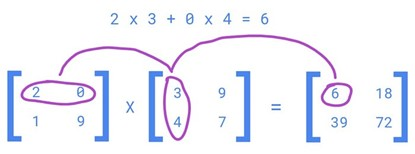

In [29]:
# Using Vectorization
tic = time.process_time()

# dot product
result = np.dot(x, m.T)

toc = time.process_time()
print("Computation time = " + str(toc - tic) + " seconds")
result

Computation time = 0.13719806100004917 seconds


array([[1.2722477 ],
       [0.98889314],
       [1.44513193],
       ...,
       [1.22405502],
       [1.09376783],
       [0.98700093]])